Firstly we open our file with data. The data is about assosiations which people think of while they are hearing the other word. The interviewed people were found in the video game communities.

In [1]:
import sqlite3


with open('wordgame_20170721.csv', 'r', encoding='utf-8') as f:
    f = f.readlines()

Here in cell down we create and connect to our database, which we call WORDGAME.db and we create the cursor object to work with this database

In [2]:
# подключаемся к базе данных
conn = sqlite3.connect('WORDGAME.db')
# создаем объект "курсор", которому будем передавать запросы
c = conn.cursor()

Now we create TWO tables in our database (which is 

In [3]:
# creating tables. First table is from the whole input data, the second consicits of "word - its assosiation"
c.execute("DROP TABLE IF EXISTS wordgame")
c.execute("DROP TABLE IF EXISTS word_assosiations")
c.execute("CREATE TABLE IF NOT EXISTS wordgame(author,	word1,	word2,	source,	sourceID)")
c.execute("CREATE TABLE IF NOT EXISTS word_assosiations(word1,	word2)")

In [4]:
# inserting values to the first table 
for row in f:
    row = row.split(',')
    c.execute("INSERT INTO wordgame VALUES (?, ?, ?, ?, ?)", (row[0], row[1], row[2], row[3], row[4]))

In [5]:
#This is for commiting changes in the database
conn.commit()

In [6]:
# inserting values to the first table 
for row in f:
    row = row.split(',')
    c.execute("INSERT INTO word_assosiations VALUES (?, ?)", (row[1], row[2]))

In [7]:
#This is for commiting changes in the database
conn.commit()

Second part of the hometask. 6 querries to the database

In [10]:
# This querry is for selecting all rows in the wordgame table that have CC source. So we choose only assosiations from CC source.
c.execute('SELECT * FROM wordgame WHERE source="CC"')
print(c.fetchall())

[('743', 'prim', 'proper', 'CC', '2\n'), ('727', 'squirrels', 'birdsi put out food for the birds', 'CC', '2\n'), ('728', 'admiral byrd', 'admiral nelson', 'CC', '2\n'), ('728', 'whiskey', 'irish', 'CC', '2\n'), ('736', 'men', 'women', 'CC', '2\n'), ('730', 'me up scotty', 'teleport', 'CC', '2\n'), ('742', 'less', 'more', 'CC', '2\n'), ('743', 'emotions', 'feelings', 'CC', '2\n'), ('727', 'genocide', 'murder', 'CC', '2\n'), ('736', 'pair', 'au', 'CC', '2\n'), ('743', 'david letterman', 'talk show', 'CC', '2\n'), ('755', 'congo', 'bill', 'CC', '2\n'), ('728', 'pastry', 'madeleine', 'CC', '2\n'), ('727', 'blue', 'bird', 'CC', '2\n'), ('743', 'goddamn', 'yankees', 'CC', '2\n'), ('723', 'hall', 'lecture', 'CC', '2\n'), ('737', 'cycle', 'uni', 'CC', '2\n'), ('727', 'csi', 'forensic', 'CC', '2\n'), ('724', 'furniture', 'move', 'CC', '2\n'), ('743', 'insane', 'asylum', 'CC', '2\n'), ('743', 'venture bros', 'cartoon', 'CC', '2\n'), ('746', 'sad', 'melacholy', 'CC', '2\n'), ('727', 'cell phones'

In [11]:
#This querry is for choosing all the rows from wordgame table that have source GOG and first word of assosiation as student.
#As we see, fewer rows have these values.
c.execute('SELECT * FROM wordgame WHERE source="GOG" AND word1 = "student"')
print(c.fetchall())

[('2061', 'student', 'thesis', 'GOG', '4\n'), ('1955', 'student', 'apprentice', 'GOG', '4\n'), ('1299', 'student', 'ineptness', 'GOG', '4\n'), ('2135', 'student', 'neophyte', 'GOG', '4\n'), ('2290', 'student', 'co ed', 'GOG', '4\n'), ('1960', 'student', 'test', 'GOG', '4\n'), ('1336', 'student', 'grasshopper', 'GOG', '4\n'), ('2061', 'student', 'university', 'GOG', '4\n'), ('1549', 'student', 'neophyte', 'GOG', '4\n'), ('1502', 'student', 'study', 'GOG', '4\n'), ('1355', 'student', 'desk', 'GOG', '4\n'), ('1308', 'student', 'campus', 'GOG', '4\n')]


In [12]:
#This querry selects rows from the second table (which is only with word assosiations) with the word "student" as the first one.
c.execute('SELECT * FROM word_assosiations WHERE word1 = "student"')
print(c.fetchall())

[('student', 'school'), ('student', 'thesis'), ('student', 'college'), ('student', 'apprentice'), ('student', 'ineptness'), ('student', 'pub'), ('student', 'books'), ('student', 'pupil'), ('student', 'lesson'), ('student', 'soccer'), ('student', 'pupil'), ('student', 'neophyte'), ('student', 'co ed'), ('student', 'teacher-class dismissed'), ('student', 'pupil'), ('student', 'book'), ('student', 'diligent'), ('student', 'college'), ('student', 'affairs'), ('student', 'test'), ('student', 'untidy'), ('student', 'bored'), ('student', 'discount'), ('student', 'books'), ('student', 'loan'), ('student', 'loan'), ('student', 'university'), ('student', 'prank'), ('student', 'sensei'), ('student', 'school'), ('student', 'homework'), ('student', 'newt'), ('student', 'grasshopper'), ('student', 'body'), ('student', 'cognition'), ('student', 'drunkard'), ('student', 'medicine'), ('student', 'school'), ('student', 'university'), ('student', 'tutor'), ('student', 'neophyte'), ('student', 'teacher'),

In [13]:
#This querry selects from wordgame table rows thats source is NOT GOG and first word is again 'student', 
#but now we also group the rows by the order of authors ID. (order by command in SQL)
c.execute('SELECT * FROM wordgame WHERE source!="GOG" AND word1 = "student" ORDER BY author')
print(c.fetchall())

[('126', 'student', 'driver', 'AC', '0\n'), ('133', 'student', 'discount', 'AC', '0\n'), ('158', 'student', 'teacher', 'AC', '0\n'), ('2381', 'student', 'diligent', 'LEF', '5\n'), ('2381', 'student', 'books', 'LEF', '5\n'), ('2403', 'student', 'lesson', 'LEF', '5\n'), ('2525', 'student', 'body', 'SAS', '6\n'), ('2525', 'student', 'body', 'SAS', '6\n'), ('2525', 'student', 'body', 'SAS', '6\n'), ('2587', 'student', 'dentist', 'SAS', '6\n'), ('312', 'student', 'sensei', 'AC', '0\n'), ('312', 'student', 'cognition', 'AC', '0\n'), ('3252', 'student', 'pupil', 'SAS', '6\n'), ('3252', 'student', 'loan', 'SAS', '6\n'), ('3314', 'student', 'book', 'SAS', '6\n'), ('3614', 'student', 'soccer', 'SAS', '6\n'), ('3799', 'student', 'university', 'SAS', '6\n'), ('383', 'student', 'school', 'BC', '1\n'), ('385', 'student', 'tutor', 'BC', '1\n'), ('4216', 'student', 'school', 'SAS', '6\n'), ('4216', 'student', 'id', 'SAS', '6\n'), ('4240', 'student', 'prank', 'SAS', '6\n'), ('4486', 'student', 'loan', 

In [14]:
#This querry counts the number of rows whose source is GOG and again the researchable word is STUDENT.
c.execute('SELECT COUNT(*) FROM wordgame WHERE source="GOG" AND word1 = "student"')
print(c.fetchall())

[(12,)]


In [15]:
#This querry counts the number of rows whose source is NOT GOG and again the researchable word is STUDENT.
c.execute('SELECT COUNT(*) FROM wordgame WHERE source!="GOG" AND word1 = "student"')
print(c.fetchall())

[(41,)]


Part 3 of the hometask. Plotting the data.

In [16]:
#here we import some libraries for creating histograms
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#initialising the data and reading it
df = pd.read_csv('wordgame_20170721.csv')
pal = sns.color_palette("Paired", 10) # color palette
df.sample(5, random_state=24)

,author,word1,word2,source,sourceID
149374,4240,stem,cell,SAS,6
229995,4978,winds,blow,WP,9
87484,796,emaciated,sadness,ECF,3
154734,3252,gentleman's,agreement,SAS,6
95685,5167,glasses,goggles,WP,9


Now let's plot the diagram that shows how words were taken from each source. We see that our data has GOG as the most frequent source.

In [18]:
sources_names = ["AS", "BC", "CC","ECF","GOG","LEF","SAS","TF","U2","WP"]

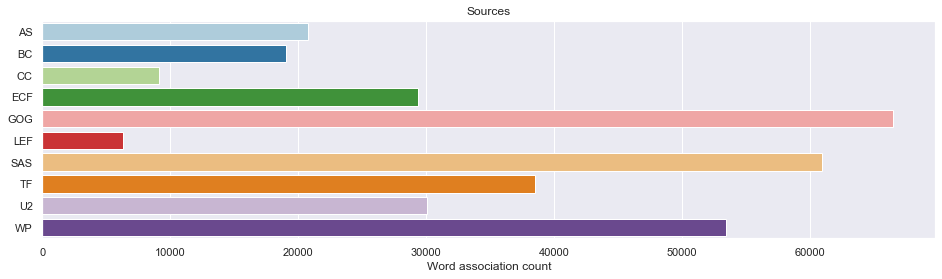

In [19]:
plt.figure(figsize=(16, 4))

sns.set(rc={'figure.figsize':(16,4)})
ax = sns.barplot(df.source.value_counts().sort_index(), sources_names, orient="h", palette=pal)
ax.set_title("Sources")
ax.set_xlabel('Word association count')
plt.show()

And now let's plot the histogram depicting the dependence between the authors ID and the source.

/Users/maximdoronkin/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/maximdoronkin/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


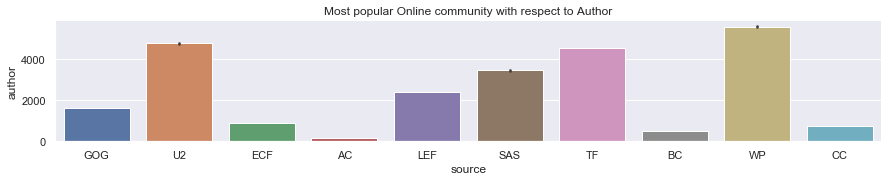

In [20]:
g = sns.factorplot(x='source', y = 'author', data = df, kind='bar',size=2.5, aspect =5.0)
plt.title('Most popular Online community with respect to Author')
plt.show()

Now lets plot the destribution of the word assosiations count by user, taking the logarithm of frequency for a better look.

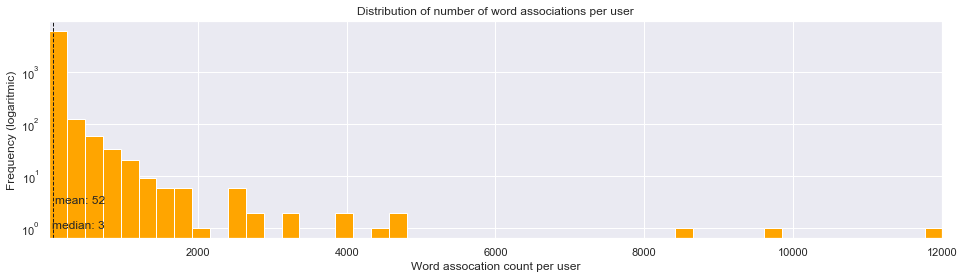

In [21]:
plt.figure(figsize=(16, 4))
median_wa = df.author.value_counts().median()
mean_wa = df.author.value_counts().mean()
plt.axvline(median_wa, color='k', linestyle='dashed', linewidth=1)
plt.text(median_wa+30, 1, "median: "+str(int(median_wa)))
plt.axvline(mean_wa, color='k', linestyle='dashed', linewidth=1)
plt.text(mean_wa+30, 3, "mean: "+str(int(mean_wa)))
g= plt.hist(df.author.value_counts(), bins=50, color="orange")
ax = plt.gca()
#ax.set_xscale('log')
ax.set_yscale('log')
plt.title('Distribution of number of word associations per user')
plt.xlabel('Word assocation count per user')
plt.ylabel('Frequency (logaritmic)')
plt.gca()
plt.xlim([1, 12000])
plt.show()

Now let's plot the most frequent words in the dataset. As we can see the word "water" is the most frequent. This is our last graph for today!

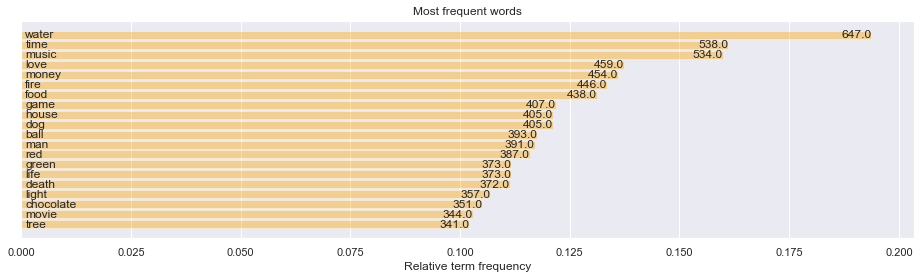

In [24]:
num_terms = len(df)
df['tf'] = df.groupby(['word2'])['word2'].transform('count')
df['rtf'] = df.tf.apply(lambda x: x*100/num_terms) # relative term frequency (percentage!)
frequent_words = df.drop_duplicates(subset=['word2']).sort_values(by=['tf'], ascending=False).head(20)
frequent_words = frequent_words[::-1] # reverse 

fig, ax = plt.subplots(figsize=(16, 4))
ax.clear()
ax.barh(frequent_words.word2, frequent_words.rtf, color="orange", alpha=0.4)
for i in range(0,len(frequent_words)):
    ax.text(frequent_words.rtf.iloc[i], i, frequent_words.tf.iloc[i], ha='right', va='center')
    ax.text(0.001, i, frequent_words.word2.iloc[i], ha='left', va='center') 
ax.set_yticks([])
plt.title("Most frequent words")
plt.xlabel('Relative term frequency')
plt.ylabel('')
testplt = plt.show()

This is the end.